CNN

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [0]:
tf.__version__

'1.13.1'

In [0]:
#convolutional layer 1
filter_size1 = 5
num_filters1 = 16

#convolutional layer 2 
filter_sixe2 = 5
num_filters2 = 36

#fully connected layer
fc_size = 128

Load Data

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [0]:
print('SIZE OF:')
print(' -Trainning-Set:\t\t{}'.format(len(data.train.labels)))
print(' -Test-Set:\t\t\t{}'.format(len(data.test.labels)))
print(' -Validation-Set:\t\t{}'.format(len(data.validation.labels)))

SIZE OF:
 -Trainning-Set:		55000
 -Test-Set:			10000
 -Validation-Set:		5000


In [0]:
data.test.cls = np.argmax(data.test.labels, axis=1)

data dimension

In [0]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_channels = 1
num_classes = 10


In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

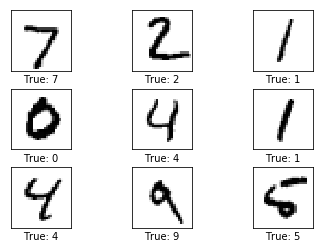

In [0]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images=images, cls_true=cls_true)

In [0]:
def new_weights(shape):
  return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [0]:
def new_biases(length):
  return tf.Variable(tf.constant(0.05, shape=[length]))

In [0]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, use_pooling=True):
  shape = [filter_size, filter_size, num_input_channels, num_filters]
  weights = new_weights(shape=shape)
  biases = new_biases(length=num_filters)
  
  layers = tf.nn.conv2d(input=input, filter=weights, strides=[1,1,1,1], padding='SAME')
  layer += biases
  
  if use_pooling:
    layer = tf.nn.max_pool(value=layer, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
  
  layer = tf.nn.relu(layer)
  
  return layer, weights

In [0]:
def flatten_layer(layer):
  layer_shape = layer.getshape()
  num_features = layer_shape[1:4].num_elements()
  layer_flat = tf.reshape(layer,[-1, num_features])
  return layer_flat, num_features

Helper-function for creating a new Fully-Connected Layer

In [0]:
def new_fc_layer(input, num_inputs, num_outputs, use_relu=True):
  weights = new_weights(shape=[num_inputs, num_outputs])
  biases = new_biases(lengts=num_outputs)
  
  layer = tf.matmul(input, weights) + biases
  
  if use_relu:
    layer = tf.nn.relu(layer)
    
  return layer

In [0]:
x = tf.placeholders(tf.float32, shape=[None, img_size_flat], name='x')

x-image = tf.reshape(x, [-1, img_size, img_size, num_channels])

y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

y_true_cls = tf.argmax(y_true, axis=1)



Convolutional layer 1

In [0]:
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=num_channels, filter_size=filter_size1, num_filters=num_filters1, use_pooling=True)

In [0]:
layer_conv1

Convolutional layer 2

In [0]:
layer_conv2, weights_conv2 = new_conv_layer(input=layer_conv1, num_input_channels=num_filters1, filter_size=filter_size2, num_filters=num_filters2, use_pooling=True)

In [0]:
layer_conv2

Flatten layer

In [0]:
layer_flat, num_features = flatten_layer(layer_conv2)

In [0]:
layer_flat


In [0]:
num_features

Fully - Connected Layer 1

In [0]:
layer_fc1 = new_fc_layer(input=layer_flat, num_inputs = new_features, num_outputs=fc_size, use_relu=True)


In [0]:
layer_fc1

Fully - Connected Layer 2

In [0]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [0]:
layer_fc2

Predicted class

In [0]:
y_pred = tf.nn.softmax(layer_fc2)

In [0]:
y_pred_cls = tf.argmax(y_pred, axis=1)

cost-function to be optimized

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)

In [0]:
cost = tf.reduce_mean(cross_entropy)

Optimizatation method

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=)

performance measure

In [0]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))